In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score
from wordcloud import WordCloud
import re
import nltk
import string
from nltk.stem import PorterStemmer
ps=PorterStemmer()

import pickle

In [ ]:
df=pd.read_csv('/content/combined_data.csv')
df=pd.DataFrame(df)
df.head(15)

FileNotFoundError: [Errno 2] No such file or directory: '/content/combined_data.csv'

In [ ]:
df.shape

(83448, 2)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83448 entries, 0 to 83447
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   label   83448 non-null  int64 
 1   text    83448 non-null  object
dtypes: int64(1), object(1)
memory usage: 1.3+ MB


In [ ]:
df.describe()

,label
count,83448.000000
mean,0.526196
std,0.499316
min,0.000000
25%,0.000000
50%,1.000000
75%,1.000000
max,1.000000


In [ ]:
df.isna().sum()

label    0
text     0
dtype: int64

In [ ]:
df.duplicated().sum()

0

In [ ]:
df1=df.drop_duplicates(keep=False)
df1.duplicated().sum()

0

In [ ]:
df=df1

In [ ]:
encoder=LabelEncoder()
df['Category']=encoder.fit_transform(df['Category'])

KeyError: 'Category'

In [ ]:
df['label'].value_counts()

label
1    43910
0    39538
Name: count, dtype: int64

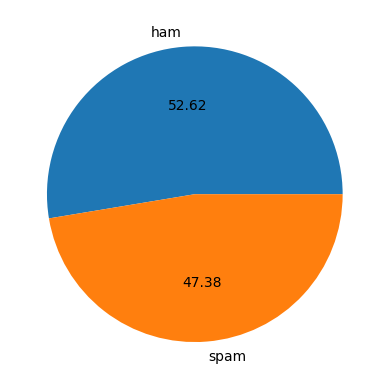

In [ ]:
import matplotlib.pyplot as plt
plt.pie(df['label'].value_counts(),labels=['ham','spam'],autopct='%0.2f')
plt.show()

In [ ]:
import nltk

nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
df['Length_of_character']=df['text'].apply(len)
df

,label,text,Length_of_character
0,1,ounce feather bowl hummingbird opec moment ala...,148
1,1,wulvob get your medircations online qnb ikud v...,808
2,0,computer connection from cnn com wednesday es...,2235
3,1,university degree obtain a prosperous future m...,592
4,0,thanks for all your answers guys i know i shou...,1362
...,...,...,...
83443,0,hi given a date how do i get the last date of ...,2589
83444,1,now you can order software on cd or download i...,616
83445,1,dear valued member canadianpharmacy provides a...,534
83446,0,subscribe change profile contact us long term ...,2113


In [ ]:
df['Length_of_words']=df['text'].apply(lambda i:len(nltk.word_tokenize(i)))
df

,label,text,Length_of_character,Length_of_words
0,1,ounce feather bowl hummingbird opec moment ala...,148,20
1,1,wulvob get your medircations online qnb ikud v...,808,104
2,0,computer connection from cnn com wednesday es...,2235,338
3,1,university degree obtain a prosperous future m...,592,76
4,0,thanks for all your answers guys i know i shou...,1362,223
...,...,...,...,...
83443,0,hi given a date how do i get the last date of ...,2589,344
83444,1,now you can order software on cd or download i...,616,118
83445,1,dear valued member canadianpharmacy provides a...,534,76
83446,0,subscribe change profile contact us long term ...,2113,277


In [ ]:
df['Number_of_Sentence']=df['text'].apply(lambda i:len(nltk.sent_tokenize(i)))
df['Number_of_Sentence'].sum()
df

,label,text,Length_of_character,Length_of_words,Number_of_Sentence
0,1,ounce feather bowl hummingbird opec moment ala...,148,20,1
1,1,wulvob get your medircations online qnb ikud v...,808,104,1
2,0,computer connection from cnn com wednesday es...,2235,338,1
3,1,university degree obtain a prosperous future m...,592,76,1
4,0,thanks for all your answers guys i know i shou...,1362,223,1
...,...,...,...,...,...
83443,0,hi given a date how do i get the last date of ...,2589,344,1
83444,1,now you can order software on cd or download i...,616,118,25
83445,1,dear valued member canadianpharmacy provides a...,534,76,1
83446,0,subscribe change profile contact us long term ...,2113,277,1


In [ ]:
df.describe()

,label,Length_of_character,Length_of_words,Number_of_Sentence
count,83448.000000,83448.000000,83448.000000,83448.000000
mean,0.526196,1662.952725,285.022733,7.250060
std,0.499316,4178.578068,727.032941,34.832317
min,0.000000,1.000000,1.000000,1.000000
25%,0.000000,449.000000,80.000000,1.000000
50%,1.000000,879.000000,154.000000,1.000000
75%,1.000000,1861.000000,314.000000,5.000000
max,1.000000,598705.000000,101984.000000,3093.000000


In [ ]:
df[df['label']==0][['Length_of_character','Length_of_words','Number_of_Sentence']].describe()

,Length_of_character,Length_of_words,Number_of_Sentence
count,39538.000000,39538.000000,39538.000000
mean,2121.693814,367.659467,8.137362
std,5666.075286,986.766959,42.112956
min,1.000000,1.000000,1.000000
25%,579.000000,107.000000,1.000000
50%,1139.000000,202.000000,1.000000
75%,2174.000000,381.000000,6.000000
max,598705.000000,101984.000000,2827.000000


In [ ]:
df[df['label']==1][['Length_of_character','Length_of_words','Number_of_Sentence']].describe()

,Length_of_character,Length_of_words,Number_of_Sentence
count,43910.000000,43910.000000,43910.000000
mean,1249.887247,210.613915,6.451105
std,1978.631507,340.723605,26.599623
min,1.000000,1.000000,1.000000
25%,360.000000,62.000000,1.000000
50%,704.000000,122.000000,1.000000
75%,1510.000000,250.000000,5.000000
max,144087.000000,25444.000000,3093.000000


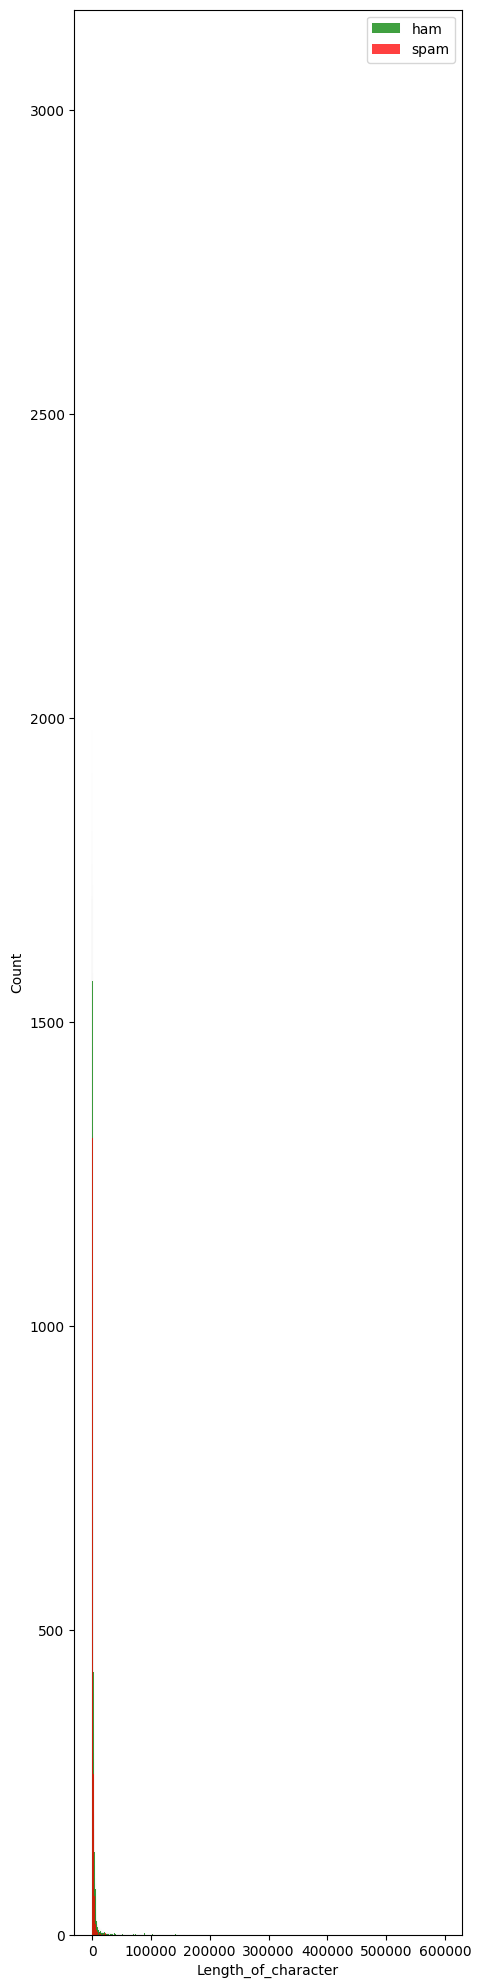

In [ ]:
plt.figure(figsize=(5,25))
sns.histplot(df[df['label']==0]['Length_of_character'],color='green')
sns.histplot(df[df['label']==1]['Length_of_character'],color='red')
plt.legend(['ham','spam'])

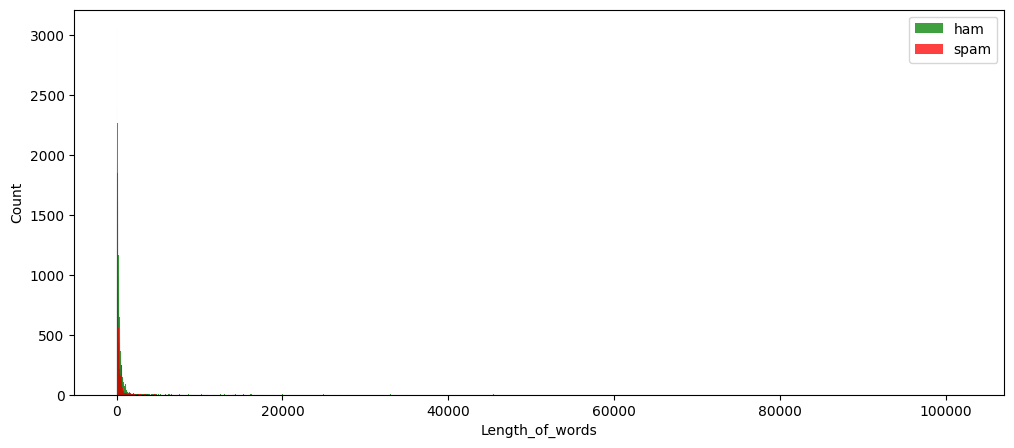

In [ ]:
plt.figure(figsize=(12,5))
sns.histplot(df[df['label']==0]['Length_of_words'],color='green')
sns.histplot(df[df['label']==1]['Length_of_words'],color='red')
plt.legend(['ham','spam'])

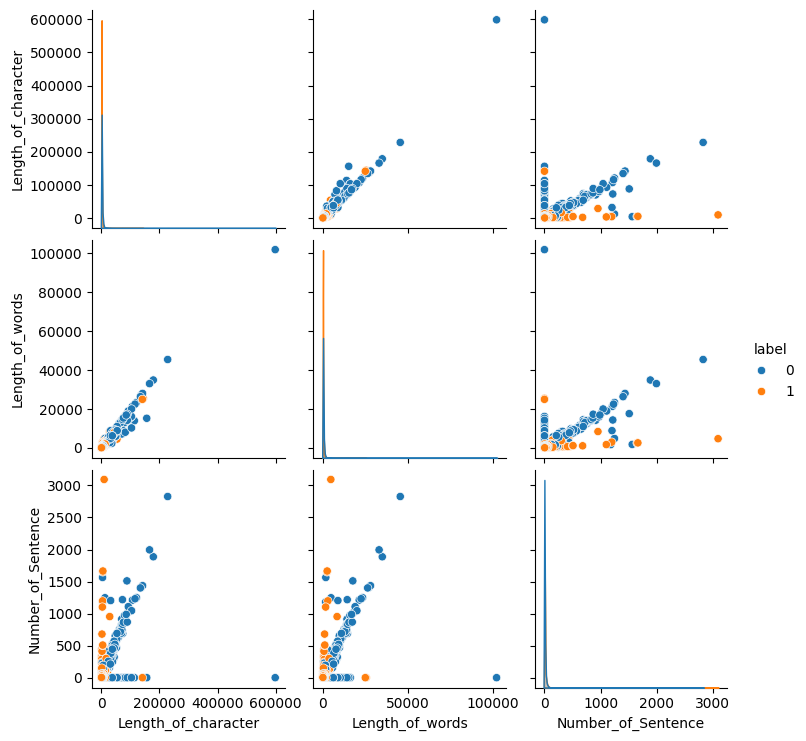

In [ ]:
sns.pairplot(df,hue='label')

In [ ]:
def final_transformed_text(text):
  text=text.lower()
  text=nltk.word_tokenize(text)

  y=[ i for i in text if i.isalnum()]

  filtered=[i for i in y if i not in stopwords.words('english') and i not in string.punctuation]

  filtered_final=[ps.stem(i) for i in filtered]

  return " ".join(filtered_final)

In [ ]:
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
from nltk.corpus import stopwords
stopwords.words('english')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...


['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [ ]:
df['final_transformed_text']=df['text'].apply(final_transformed_text)

In [ ]:
df

,label,text,Length_of_character,Length_of_words,Number_of_Sentence,final_transformed_text
0,1,ounce feather bowl hummingbird opec moment ala...,148,20,1,ounc feather bowl hummingbird opec moment alab...
1,1,wulvob get your medircations online qnb ikud v...,808,104,1,wulvob get medirc onlin qnb ikud viagra escape...
2,0,computer connection from cnn com wednesday es...,2235,338,1,comput connect cnn com wednesday escapenumb ma...
3,1,university degree obtain a prosperous future m...,592,76,1,univers degre obtain prosper futur money earn ...
4,0,thanks for all your answers guys i know i shou...,1362,223,1,thank answer guy know check rsync manual would...
...,...,...,...,...,...,...
83443,0,hi given a date how do i get the last date of ...,2589,344,1,hi given date get last date month data form yy...
83444,1,now you can order software on cd or download i...,616,118,25,order softwar cd download site immedi delphi 7...
83445,1,dear valued member canadianpharmacy provides a...,534,76,1,dear valu member canadianpharmaci provid wide ...
83446,0,subscribe change profile contact us long term ...,2113,277,1,subscrib chang profil contact us long term esc...


In [ ]:
wc=WordCloud(width=3000,height=3000,min_font_size=10,background_color='white')

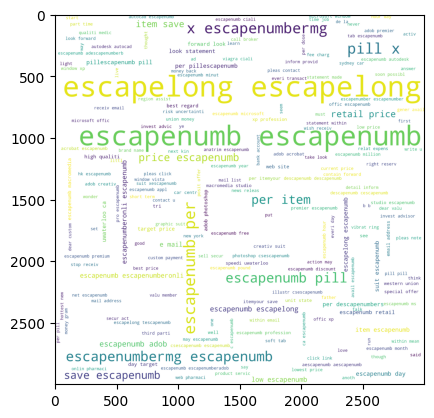

In [ ]:
word_cloud=wc.generate(df[df['label']==1]['final_transformed_text'].str.cat(sep=" "))
plt.imshow(word_cloud)

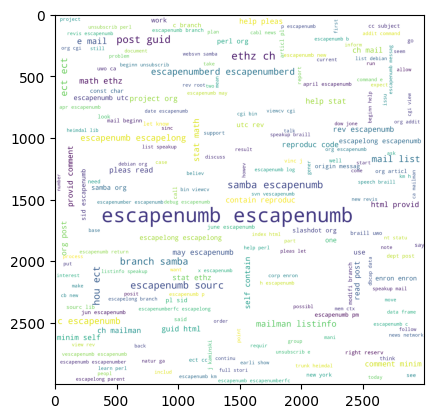

In [ ]:
word_cloud=wc.generate(df[df['label']==0]['final_transformed_text'].str.cat(sep=" "))
plt.imshow(word_cloud)

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
tfidf = TfidfVectorizer(max_features=3000)

In [ ]:
x=tfidf.fit_transform(df['final_transformed_text']).toarray()
y=df['label'].values

In [ ]:
x=x.toarray()

In [ ]:
print(x.shape)
print(y.shape)

(83448, 3000)
(83448,)


**Logistic Regression**

In [ ]:
lr=LogisticRegression()

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=2)

In [ ]:
lr.fit(x_train,y_train)
pred=lr.predict(x_test)

lracc=accuracy_score(y_test,pred)
lrprecision=precision_score(y_test,pred)

print(accuracy_score(y_test,pred))
print(confusion_matrix(y_test,pred))
print(precision_score(y_test,pred))

0.9803475134811265
[[7687  225]
 [ 103 8675]]
0.9747191011235955


**Naive Bayes**

In [ ]:
gnb = GaussianNB()
mnb=MultinomialNB()
bnb=BernoulliNB()

In [ ]:
gnb.fit(x_train,y_train)
y_pred = gnb.predict(x_test)

gnbacc=accuracy_score(y_test,y_pred)
gnbprecision=precision_score(y_test,y_pred)

print(accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(precision_score(y_test,y_pred))

0.9588376273217496
[[7476  436]
 [ 251 8527]]
0.9513555729108557


In [ ]:
mnb.fit(x_train,y_train)
y1_pred=mnb.predict(x_test)

mnbacc=accuracy_score(y_test,y_pred)
mnbprecision=precision_score(y_test,y_pred)

print(accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y1_pred))
print(precision_score(y_test,y1_pred))

0.9588376273217496
[[7510  402]
 [ 354 8424]]
0.9544527532290958


In [ ]:
bnb.fit(x_train,y_train)
y2_pred=bnb.predict(x_test)

bnbacc=accuracy_score(y_test,y_pred)
bnbprecision=precision_score(y_test,y_pred)

print(accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y2_pred))
print(precision_score(y_test,y2_pred))

0.9588376273217496
[[6690 1222]
 [ 479 8299]]
0.8716521373805273


In [ ]:
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [ ]:
svc=SVC(kernel='sigmoid',gamma=1.0)
dtc=DecisionTreeClassifier(max_depth=5)
knc=KNeighborsClassifier()
rfc=RandomForestClassifier(n_estimators=50,random_state=2)
abc=AdaBoostClassifier(n_estimators=50,random_state=2)
bc=BaggingClassifier(n_estimators=50,random_state=2)
etc=ExtraTreesClassifier(n_estimators=50,random_state=2)
gbc=GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb=XGBClassifier(n_estimators=50,random_state=2)

In [ ]:
clfs={
    'SVC':svc,
    'DecisionTreeClassifier':dtc,
    'KNeighborsClassifier':knc,
    'RandomForestClassifier':rfc,
    'AdaBoostClassifier':abc,
    'BaggingClassifier':bc,
    'ExtraTreesClassifier':etc,
    'GradientBoostingClassifier':gbc,
    'XGBClassifier':xgb,
}

In [ ]:
def train_classifier(clf,x_train,y_train,x_test,y_test):
  clf.fit(x_train,y_train)
  y_pred=clf.predict(x_test)
  accuracy=accuracy_score(y_test,y_pred)
  precision=precision_score(y_test,y_pred)

  return accuracy,precision

In [ ]:
accuracy_scores=[]
precision_scores=[]

for name,clf in clfs.items():
  current_accuracy,current_precision=train_classifier(clf,x_train,y_train,x_test,y_test)
  print("For ",name)
  print("Accuracy - ",current_accuracy)
  print("Precision - ",current_precision)
  print("\n")

  accuracy_scores.append(current_accuracy)
  precision_scores.append(current_precision)

In [ ]:
`all_algo=pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values('Precision',ascending=False)
all_algo

In [ ]:
new_rows = pd.DataFrame({
    'Algorithm': ['Logistic Regression', 'Gaussian NB','Multinomial NB','Bernoulli NB'],
    'Accuracy': [ lracc, gnbacc, mnbacc, bnbacc],
    'Precision': [lrprecision, gnbprecision, mnbprecision, bnbprecision]
})

# Concatenate the new DataFrame with the existing 'all_algo' DataFrame
all_algo = pd.concat([all_algo, new_rows], ignore_index=True)

In [ ]:
all_algo

,Algorithm,Accuracy,Precision
0,KNeighborsClassifier,0.929158,1.000000
1,RandomForestClassifier,0.977413,0.973684
2,XGBClassifier,0.975359,0.960526
3,ExtraTreesClassifier,0.978439,0.939759
4,AdaBoostClassifier,0.974333,0.925926
5,GradientBoostingClassifier,0.959959,0.923077
6,SVC,0.971253,0.875000
7,BaggingClassifier,0.964066,0.817204
8,DecisionTreeClassifier,0.949692,0.800000
9,Logistic Regression,0.977413,0.986486


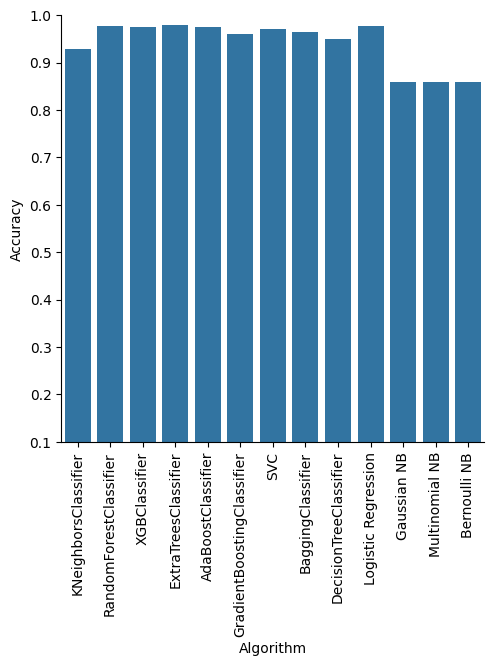

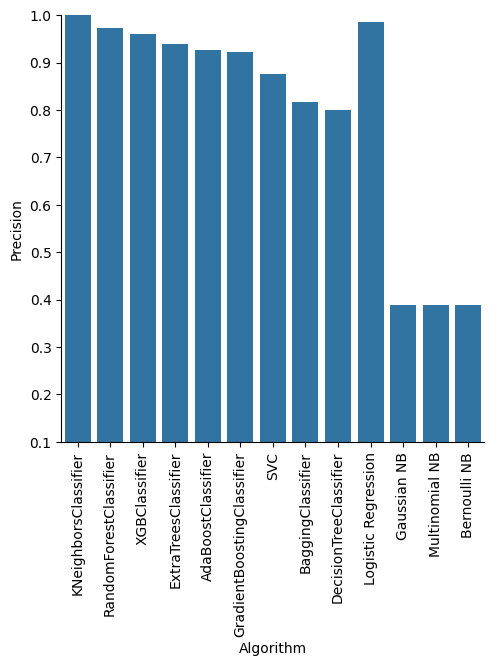

In [ ]:
sns.catplot(x='Algorithm',y='Accuracy', data=all_algo,kind='bar',height=5)
plt.ylim(0.1,1.0)
plt.xticks(rotation='vertical')
plt.show()

print('\n')

sns.catplot(x='Algorithm',y='Precision',data=all_algo,kind='bar',height=5)
plt.ylim(0.1,1.0)
plt.xticks(rotation='vertical')
plt.show()


**Improving Model**

In [ ]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_scaling':accuracy_scores,'Precision_scaling':precision_scores}).sort_values('Precision_scaling',ascending=False)
temp_df

,Algorithm,Accuracy_scaling,Precision_scaling
2,KNeighborsClassifier,0.929158,1.000000
3,RandomForestClassifier,0.977413,0.973684
8,XGBClassifier,0.975359,0.960526
6,ExtraTreesClassifier,0.978439,0.939759
4,AdaBoostClassifier,0.974333,0.925926
7,GradientBoostingClassifier,0.959959,0.923077
0,SVC,0.971253,0.875000
5,BaggingClassifier,0.964066,0.817204
1,DecisionTreeClassifier,0.949692,0.800000


In [ ]:
# Scaling

scaler=MinMaxScaler()
x=scaler.fit_transform(x)

In [ ]:
new_df = all_algo.merge(temp_df,on='Algorithm')
new_df

,Algorithm,Accuracy,Precision,Accuracy_scaling,Precision_scaling
0,KNeighborsClassifier,0.929158,1.000000,0.929158,1.000000
1,RandomForestClassifier,0.977413,0.973684,0.977413,0.973684
2,XGBClassifier,0.975359,0.960526,0.975359,0.960526
3,ExtraTreesClassifier,0.978439,0.939759,0.978439,0.939759
4,AdaBoostClassifier,0.974333,0.925926,0.974333,0.925926
5,GradientBoostingClassifier,0.959959,0.923077,0.959959,0.923077
6,SVC,0.971253,0.875000,0.971253,0.875000
7,BaggingClassifier,0.964066,0.817204,0.964066,0.817204
8,DecisionTreeClassifier,0.949692,0.800000,0.949692,0.800000


In [ ]:
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(gnb,open('model.pkl','wb'))